In [2]:
import pandas as pd

# Read Excel file
df = pd.read_excel("Data.xlsx")

# describe 
desc = df.describe()

# Just get the mean, std, min, max values
desc_filtered = desc.loc[['mean', 'std', 'min', 'max']]

# Save to Excel file
desc_filtered.to_excel("basic_statistics.xlsx")


print("Simplified statistics table successfully created and saved to Excel.")

Sadeleştirilmiş istatistik tablosu başarıyla oluşturuldu ve Excel'e kaydedildi.


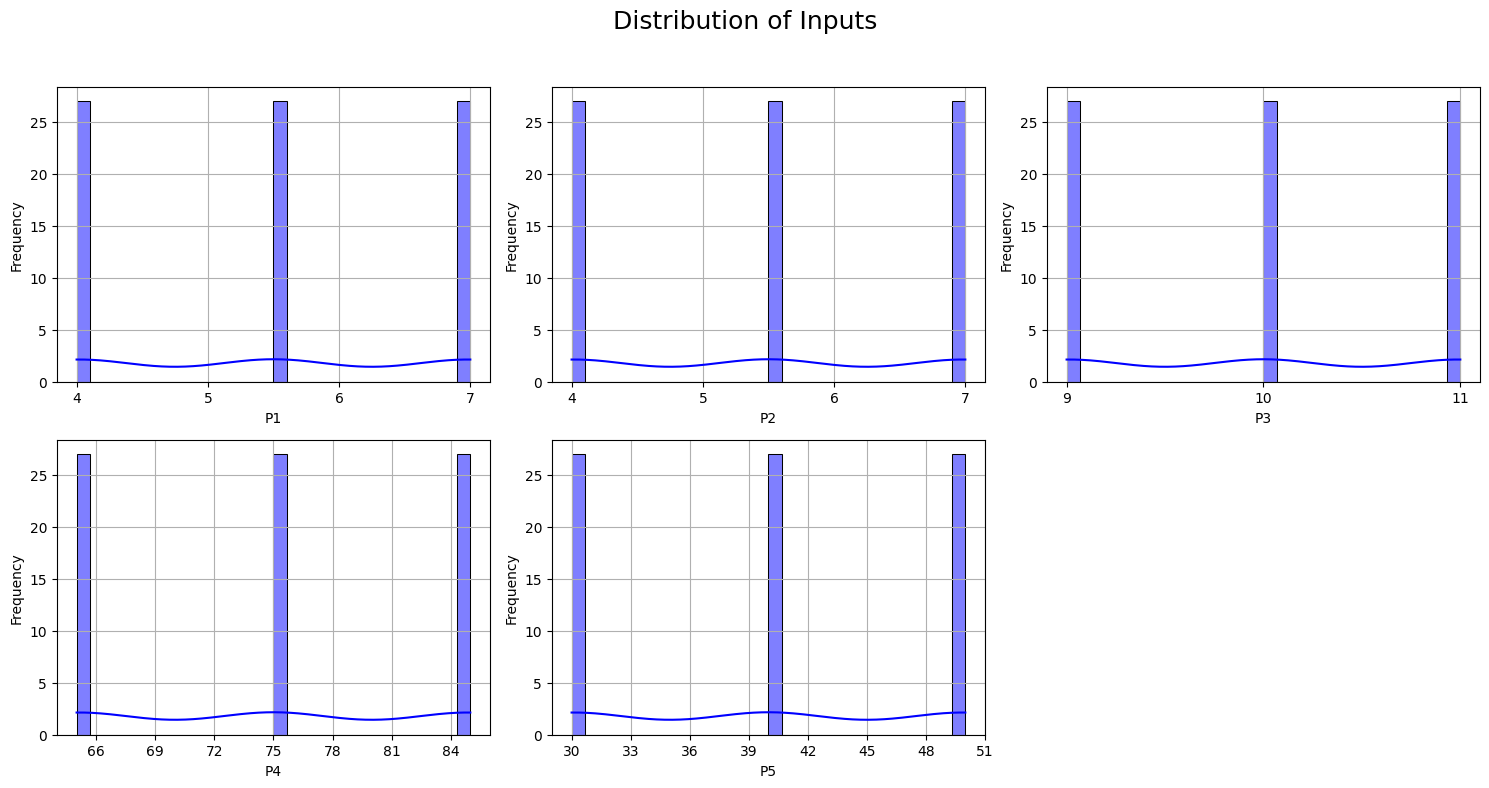

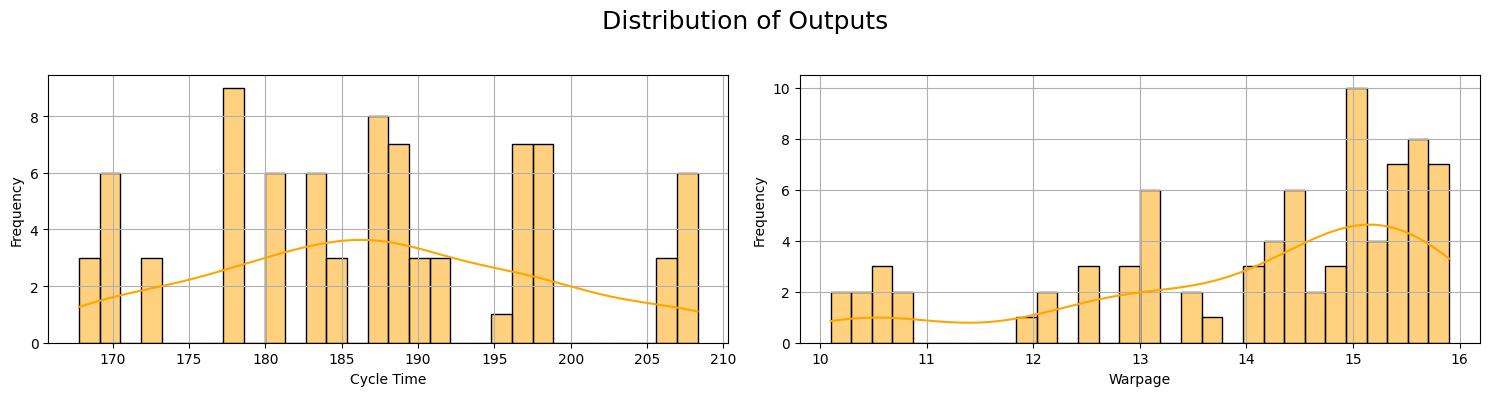

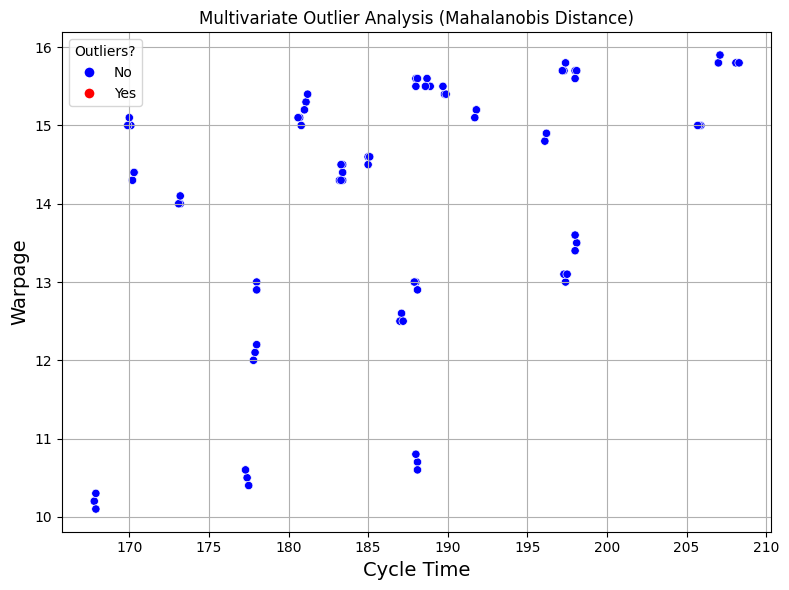

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import MaxNLocator
kde_color = 'orange'    

# Variable lists
input_columns = df.columns[:5]
output_columns = df.columns[5:]

### --- INPUTs ---
n_cols = 3
n_rows_in = math.ceil(len(input_columns) / n_cols)

plt.figure(figsize=(15, n_rows_in * 4))

for i, col in enumerate(input_columns):
    ax = plt.subplot(n_rows_in, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.suptitle("Distribution of Inputs", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save as SVG
plt.savefig("Distribution of Inputs.svg", format='svg')
plt.show()


### --- OUTPUTs ---
n_cols = 2
n_rows_out = math.ceil(len(output_columns) / n_cols)

plt.figure(figsize=(15, n_rows_out * 4))

for i, col in enumerate(output_columns):
    ax = plt.subplot(n_rows_out, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='orange')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.suptitle("Distribution of Outputs", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save as SVG
plt.savefig("Distribution of Outputs.svg", format='svg')

plt.show()



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2


# Outputs
Y = df.iloc[:, 5:7]  # Output1 and Output2

# Means and covariance matrix
mean_y = np.mean(Y, axis=0)
cov_y = np.cov(Y.T)
inv_cov_y = np.linalg.inv(cov_y)

# Calculate Mahalanobis distance
mahalanobis_distances = []
for i in range(len(Y)):
    diff = Y.iloc[i] - mean_y
    m_distance = np.dot(np.dot(diff, inv_cov_y), diff.T)
    mahalanobis_distances.append(m_distance)

# Critical threshold value (chi2 threshold for p=0.99, 2 variables)
threshold = chi2.ppf(0.99, df=2)

# Those who are out of line
outliers = np.array(mahalanobis_distances) > threshold

# Add the results to the dataframe
Y_result = Y.copy()
Y_result["Mahalanobis_Distance"] = mahalanobis_distances
Y_result["Outlier"] = outliers

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(
    x=Y.iloc[:, 0],
    y=Y.iloc[:, 1],
    hue=outliers,
    palette={False: "blue", True: "red"},
    legend=False # We will define our own legend
)

# Round legend symbols
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='No', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Yes', markerfacecolor='red', markersize=8)
]

# Legend setups
plt.legend(handles=legend_elements, title="Outliers?")

# Label the axis
plt.xlabel(Y.columns[0], fontsize=14)
plt.ylabel(Y.columns[1], fontsize=14)
plt.title("Multivariate Outlier Analysis (Mahalanobis Distance)")
plt.grid(True)
plt.tight_layout()

# Save as SVG
plt.savefig("multivariate_outlier_analysis.svg", format='svg')

plt.show()





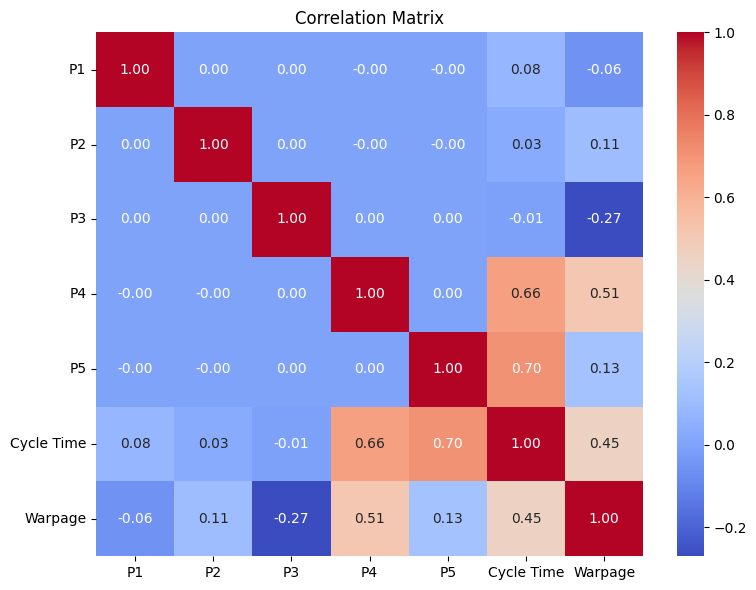

In [7]:
# Korelasyon matrisi ve heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
# SVG olarak kaydet
plt.savefig("Correlation Matrix.svg", format='svg')
plt.show()
